In [1]:
%matplotlib inline     
# ^Sans animations
# %matplotlib notebook 
# ^Avec animations
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

 **Remplissage d'une bibliothèque**
 

Nous allons modeliser l'évolution de l'affluence dans la bibliothèque des Licences au cours du temps.

Nous disposons des horaires et du nombre de place de la bibliothèque 

In [2]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque

def alea_entree(aff,afflim,p1):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité ,retourne 1 si l'élève rentre, sinon 0.
    '''
    if aff>=afflim :
        u = np.random.random() # u est un nombre aléatoire entre 0 et 1
        if u < p1: 
            return 0
    return 1

In [3]:
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p2 : la probabilité que la personne ne sort pas de la bibliothèque

p2 =.95
def alea_sortie(aff,afflim,p2):
    '''
    float->int
    en fonction du taux d'affluence et d'une probabilité p2,retourne 1 si l'élève sort, sinon 0 0.
    '''
    if aff>=afflim :
        u = np.random.random()  # u est un nombre aléatoire entre 0 et 1
        if u < p2: 
            return 0
        else:
            return 1
    return 0

In [4]:
#bt0: nombre initial de personne dans la bibliothèque. 
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
# p2 : la probabilité que la personne ne sort pas de la bibliothèque
#n : nombre de cycle entrée/sortie

def bibliothèque(bt0,btmax,afflim,p1,p2,n):
    ''' hyp : bt0 <= btmax
        Evolution du nombre de place occupé dans la bibliothèque.'''
    
    bt=bt0
    aff=bt/btmax
    L=[bt0] #Evolution de l'occupation
    for i in range(n):
        a = alea_entree(aff,afflim,p1)
        b = alea_sortie(aff,afflim,p2)
        if bt < btmax:
            bt += a
        if bt>0:
            bt-=b
        L.append(bt)
        aff=bt/btmax
    return L
        
        
        
        

affichons la courbe de l'évolution de l'occupation de la bibliothèque sur un nombre de tour

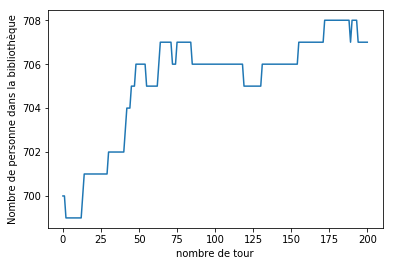

In [5]:
def plotb0(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("nombre de tour")
    plt.show()
    return
plotb0(bibliothèque(700,745,.8,.9,.95,200))

Ici nous etudions l'evolution du remplissage de la bibliothèque en fonction du temps 

In [26]:
# Exemple : horaire pour la BDL
horaire = [(9,22) , (9,22) , (9,22) , (9,22) , (9,22) , (10,20),(0,0)]

def est_ouvert(heure,jour,horaire):
    '''float * int * dict[tuple] -> bool
    indique si la bibliotheque est ouverte ou fermée en fonction de l'heure actuelle 'heure', 
    du jour de la semaine 'jour' et des horaires d'ouverture 'horaire'  '''
    
    date = horaire[jour]
    if date!= (0,0):
        ouverture = date[0]
        fermeture = date[1]
        return ouverture <= heure < fermeture
    return False

In [27]:
# Exemple : On teste si la bibliothèque est ouverte le lundi à 11h.
print( est_ouvert(23,0,horaire) )

False


Nouvelle modélisation en tenant compte du paramètre horaire.
De plus, nous introduirons trois nouvelles fonctions : nb_entre, nb_sortie et aff_actu.


In [114]:
#affluence selon l'heure et le jour

semaine = {'lundi' : [0.17, 0.33, 0.42, 0.5, 0.58, 0.58, 0.67, 0.75, 0.83, 0.92, 0.75, 0.5, 0.25] , 
 'mardi' : [0.08, 0.17, 0.25, 0.33, 0.42, 0.42, 0.42, 0.5, 0.58, 0.58, 0.5, 0.33, 0.17] , 
 'mercredi' : [0.17, 0.33, 0.42, 0.5, 0.5, 0.5, 0.58, 0.58, 0.58, 0.5, 0.33, 0.25, 0.08] ,
 'jeudi' : [0.08, 0.17, 0.25, 0.33, 0.5, 0.58, 0.5, 0.5, 0.67, 0.75, 0.67, 0.42, 0.17] , 
 'vendredi' : [0.08, 0.25, 0.5, 0.58, 0.67, 0.83, 0.83, 0.67, 0.67, 0.67, 0.67, 0.42, 0.17] , 
 'samedi' : [0.25, 0.75, 0.58, 0.75, 0.92, 0.83, 0.83, 1.0, 0.75, 0.25] }

In [118]:
def aff_actu(heure,jour):
    # modelise le nombre de cycle entrée/sortie en fonction de l'heure.
    #convertir jours en int
    x=semaine[jours].values
    print (x)
    return 
aff_actu(0,lundi)

KeyError: 5

In [9]:
#tirage aléatoire du nombre d'entrée

# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
#emax : nombre de place restant
#t: heure actuelle
#nb: nombre de tirage
# s: nombre de personnes qui entrent

def nb_entre(aff,afflim,p1,emax,t):
    s=0
    nb= 10
    nb=np.random.randint(0,nb)
    if nb>emax:
        nb = emax
    for i in range(nb):
        s += alea_entree(aff,afflim,p1)
    return s


In [10]:
#idem que pour nb_entre

def nb_sortie(aff,afflim,p2,bt):
    s=0
    nb= 10
    nb=np.random.randint(0,nb)
    if nb>bt:
        nb = bt
    for i in range(nb):
        s += alea_sortie(aff,afflim,p2)
    return s


In [11]:
# Bibliothèquetemp permet  en fonction des horaires d'ouverture de la bibliothèque
# et de l'heure de la journée de faire des entrée/sortie multiple.

#bt0: nombre initial de personne dans la bibliothèque. 
# bt : nombre de personne dans la bibliothèque à l'instant t
#btmax: nombre de places de la bibliothèque.
# aff : le taux d'affluence actuelle
# afflim : le taux d'affluence à partir duquel la personne hésite
# p1 : la probabilité que la personne ne rentre pas dans la bibliothèque
# p2 : la probabilité que la personne ne sort pas de la bibliothèque
# On fera un cycle de 24h

def bibliothèquetemp(bt0,btmax,afflim,p1,p2):
    ''' hyp : bt0 <= bt'''
    bt=bt0
    aff=bt/btmax
    L=[bt0]
    for t in range(24):
        if est_ouvert(t):
            emax = btmax-bt
            a = nb_entre(aff,afflim,p1,emax,t)
            b = nb_sortie(aff,afflim,p2,bt)
            if bt < btmax:
                bt += a
            if bt>0:
                bt-=b
        else:
            bt=0
        L.append(bt)
        aff=bt/btmax
    return L
        
    


affichons la courbe

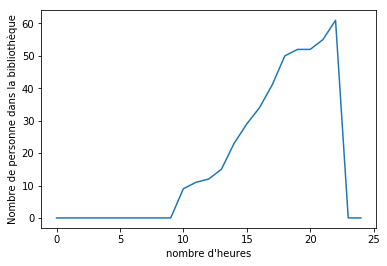

In [12]:
def plotb1(L):
    plt.figure()
    plt.plot(L)
    plt.ylabel("Nombre de personne dans la bibliothèque")
    plt.xlabel("nombre d'heures")
    plt.show()
    return 
plotb1(bibliothèquetemp(0,745,.8,.9,.95))
                      #(bt0,btmax,afflim,p1,p2)

#t0,btmax,afflim,p1,p2,n

nous voyons que plus la probabilité p1 de ne pas entrer est plus grande


**sortie et entrée aléatoire multiple:**

In [97]:
for i in jour:
    for j in range(len(i)):
        i[j] = round(i[j],2)
for i in jour:
    print(i)
    print()

[0.17, 0.33, 0.42, 0.5, 0.58, 0.58, 0.67, 0.75, 0.83, 0.92, 0.75, 0.5, 0.25]

[0.08, 0.17, 0.25, 0.33, 0.42, 0.42, 0.42, 0.5, 0.58, 0.58, 0.5, 0.33, 0.17]

[0.17, 0.33, 0.42, 0.5, 0.5, 0.5, 0.58, 0.58, 0.58, 0.5, 0.33, 0.25, 0.08]

[0.08, 0.17, 0.25, 0.33, 0.5, 0.58, 0.5, 0.5, 0.67, 0.75, 0.67, 0.42, 0.17]

[0.08, 0.25, 0.5, 0.58, 0.67, 0.83, 0.83, 0.67, 0.67, 0.67, 0.67, 0.42, 0.17]

[0.25, 0.75, 0.58, 0.75, 0.92, 0.83, 0.83, 1.0, 0.75, 0.25]

